# Kapitel 6.5: Entitäten

Das Notebook ergänzt Kapitel 6.5 'Entitäten'.

# Import

In [1]:
import pandas as pd
import numpy as np

from resources_statistics import *
from resources_geschichtslyrik import *

import plotly.express as px

from tqdm.notebook import tqdm

from scipy.stats import mannwhitneyu

In [2]:
meta = pd.read_json(r"../resources/meta.json")

# Merkmale hinzufügen

In [3]:
meta['entity_count'] = [0 if pd.isna(x) else x.count('+')+1 for x in meta['entity_simple']]

# Korpora

### Korpora erstellen

In [4]:
meta_anth = (
    meta
    .query("corpus=='anth'")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)
meta_anth_ratings = get_rating_table(meta_anth, mode = 'entity')
meta_anth_bin = binarize_meta(meta_anth)

In [5]:
modcanon_authors = ['Hofmannsthal, Hugo von', 'Rilke, Rainer Maria', 'George, Stefan', 'Heym, Georg']

meta_modcanon = (
    meta
    .query("author in @modcanon_authors")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)
meta_modcanon_ratings = get_rating_table(meta_modcanon, mode = 'entity')

In [6]:
muench_authors = ['Münchhausen, Börries von', 'Miegel, Agnes', 'Strauß und Torney, Lulu von']

meta_muench = (
    meta
    .query("author in @muench_authors")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)
meta_muench_ratings = get_rating_table(meta_muench, mode = 'entity')

In [7]:
sub_df = pd.DataFrame()
sub_names = ['Anthologien', 'Kanonisierte Moderne', 'Münchhausen-Kreis']
sub_metas = [meta_anth, meta_modcanon, meta_muench]
sub_ratings = [meta_anth_ratings, meta_modcanon_ratings, meta_muench_ratings]

### Merkmale zu Subkorpora hinzufügen

In [8]:
for this_name, this_meta, this_ratings in zip(sub_names, sub_metas, sub_ratings):
    sub_df.loc[this_name, 'Jahr'] = round(this_meta['year'].mean(), 0)
        
    sub_df.loc[this_name, 'Texte'] = this_meta.shape[0]
    sub_df.loc[this_name, '1_entity_share'] = this_meta.query("entity_count == 1").shape[0]/this_meta.shape[0]
    sub_df.loc[this_name, '2_entity_share'] = this_meta.query("entity_count == 2").shape[0]/this_meta.shape[0]
    sub_df.loc[this_name, '3_entity_share'] = this_meta.query("entity_count == 3").shape[0]/this_meta.shape[0]
    sub_df.loc[this_name, '4_entity_share'] = this_meta.query("entity_count >= 4").shape[0]/this_meta.shape[0] 
    sub_df.loc[this_name, 'entity_count_mean'] = this_meta['entity_count'].mean()
    
    sub_df.loc[this_name, 'bekanntes_individuum_count'] = ' '.join(this_meta['entity_simple']).count("1")
    sub_df.loc[this_name, 'unbekanntes_individuum_count'] = ' '.join(this_meta['entity_simple']).count("2")
    sub_df.loc[this_name, 'kollektiv_count'] = ' '.join(this_meta['entity_simple']).count("3")
    sub_df.loc[this_name, 'nichtmensch_count'] = ' '.join(this_meta['entity_simple']).count("4")
    sub_df.loc[this_name, 'bekanntes_individuum_share'] = ' '.join(this_meta['entity_simple']).count("1")/this_meta['entity_count'].sum()
    sub_df.loc[this_name, 'unbekanntes_individuum_share'] = ' '.join(this_meta['entity_simple']).count("2")/this_meta['entity_count'].sum()
    sub_df.loc[this_name, 'kollektiv_share'] = ' '.join(this_meta['entity_simple']).count("3")/this_meta['entity_count'].sum()
    sub_df.loc[this_name, 'nichtmensch_share'] = ' '.join(this_meta['entity_simple']).count("4")/this_meta['entity_count'].sum()
    
    sub_df.loc[this_name, 'entity_neutral_share'] = this_ratings.query("rating=='0'").shape[0]/this_meta['entity_count'].sum()
    sub_df.loc[this_name, 'entity_positiv_share'] = this_ratings.query("rating=='1'").shape[0]/this_meta['entity_count'].sum()
    sub_df.loc[this_name, 'entity_negativ_share'] = this_ratings.query("rating=='2'").shape[0]/this_meta['entity_count'].sum()
    sub_df.loc[this_name, 'entity_ambivalent_share'] = this_ratings.query("rating=='3'").shape[0]/this_meta['entity_count'].sum()
    
    sub_df.loc[this_name, 'bekanntes_individuum_neutral_share'] = this_ratings.query("type == '1' and rating=='0'").shape[0]/this_ratings.query("type == '1'").shape[0]
    sub_df.loc[this_name, 'bekanntes_individuum_positiv_share'] = this_ratings.query("type == '1' and rating=='1'").shape[0]/this_ratings.query("type == '1'").shape[0]
    sub_df.loc[this_name, 'bekanntes_individuum_negativ_share'] = this_ratings.query("type == '1' and rating=='2'").shape[0]/this_ratings.query("type == '1'").shape[0]
    sub_df.loc[this_name, 'bekanntes_individuum_ambivalent_share'] = this_ratings.query("type == '1' and rating=='3'").shape[0]/this_ratings.query("type == '1'").shape[0]

    sub_df.loc[this_name, 'unbekanntes_individuum_neutral_share'] = this_ratings.query("type == '2' and rating=='0'").shape[0]/this_ratings.query("type == '2'").shape[0]
    sub_df.loc[this_name, 'unbekanntes_individuum_positiv_share'] = this_ratings.query("type == '2' and rating=='1'").shape[0]/this_ratings.query("type == '2'").shape[0]
    sub_df.loc[this_name, 'unbekanntes_individuum_negativ_share'] = this_ratings.query("type == '2' and rating=='2'").shape[0]/this_ratings.query("type == '2'").shape[0]
    sub_df.loc[this_name, 'unbekanntes_individuum_ambivalent_share'] = this_ratings.query("type == '2' and rating=='3'").shape[0]/this_ratings.query("type == '2'").shape[0]

    sub_df.loc[this_name, 'kollektiv_neutral_share'] = this_ratings.query("type == '3' and rating=='0'").shape[0]/this_ratings.query("type == '3'").shape[0]
    sub_df.loc[this_name, 'kollektiv_positiv_share'] = this_ratings.query("type == '3' and rating=='1'").shape[0]/this_ratings.query("type == '3'").shape[0]
    sub_df.loc[this_name, 'kollektiv_negativ_share'] = this_ratings.query("type == '3' and rating=='2'").shape[0]/this_ratings.query("type == '3'").shape[0]
    sub_df.loc[this_name, 'kollektiv_ambivalent_share'] = this_ratings.query("type == '3' and rating=='3'").shape[0]/this_ratings.query("type == '3'").shape[0]

In [9]:
round(sub_df, 2)

,Jahr,Texte,1_entity_share,2_entity_share,3_entity_share,4_entity_share,entity_count_mean,bekanntes_individuum_count,unbekanntes_individuum_count,kollektiv_count,...,bekanntes_individuum_negativ_share,bekanntes_individuum_ambivalent_share,unbekanntes_individuum_neutral_share,unbekanntes_individuum_positiv_share,unbekanntes_individuum_negativ_share,unbekanntes_individuum_ambivalent_share,kollektiv_neutral_share,kollektiv_positiv_share,kollektiv_negativ_share,kollektiv_ambivalent_share
Anthologien,1875.0,1850.0,0.25,0.45,0.25,0.06,2.12,2025.0,631.0,1064.0,...,0.14,0.07,0.48,0.34,0.13,0.05,0.31,0.37,0.25,0.06
Kanonisierte Moderne,1903.0,113.0,0.44,0.34,0.20,0.02,1.80,47.0,54.0,82.0,...,0.22,0.02,0.67,0.19,0.12,0.02,0.40,0.26,0.27,0.07
Münchhausen-Kreis,1905.0,140.0,0.26,0.40,0.23,0.11,2.22,119.0,117.0,62.0,...,0.13,0.08,0.62,0.30,0.06,0.03,0.44,0.31,0.23,0.03


# Zeitverlauf

In [10]:
ts = pd.DataFrame()
ts.index = pd.Series(range(1850, 1919), name = 'year')

In [11]:
ts['text_count'] = meta_anth.groupby('year').size()
ts['text_count'] = ts['text_count'].fillna(0)
ts['text_sum'] = smooth(ts['text_count'], mode = 'sum')

In [12]:
ts['1_entity_count'] = [meta_anth.query("year == @x and entity_count == 1").shape[0] for x in ts.index]
ts['1_entity_sum'] = smooth(ts['1_entity_count'], mode = 'sum')
ts['1_entity_share_smoothed'] = ts['1_entity_sum']/ts['text_sum']

ts['2_entity_count'] = [meta_anth.query("year == @x and entity_count == 2").shape[0] for x in ts.index]
ts['2_entity_sum'] = smooth(ts['2_entity_count'], mode = 'sum')
ts['2_entity_share_smoothed'] = ts['2_entity_sum']/ts['text_sum']

ts['3_entity_count'] = [meta_anth.query("year == @x and entity_count == 3").shape[0] for x in ts.index]
ts['3_entity_sum'] = smooth(ts['3_entity_count'], mode = 'sum')
ts['3_entity_share_smoothed'] = ts['3_entity_sum']/ts['text_sum']

ts['4_entity_count'] = [meta_anth.query("year == @x and entity_count >= 4").shape[0] for x in ts.index]
ts['4_entity_sum'] = smooth(ts['4_entity_count'], mode = 'sum')
ts['4_entity_share_smoothed'] = ts['4_entity_sum']/ts['text_sum']

ts['total_entity_count'] = [meta_anth.query("year == @x")['entity_count'].sum() for x in ts.index]
ts['total_entity_count_sum'] = smooth(ts['total_entity_count'], mode = 'sum')
ts['total_entity_count_smoothed'] = ts['total_entity_count_sum']/ts['text_sum']

ts['bekanntes_individuum_count'] = [' '.join(meta_anth.query("year == @x")['entity_simple']).count("1") for x in ts.index]
ts['bekanntes_individuum_sum'] = smooth(ts['bekanntes_individuum_count'], mode = 'sum')
ts['bekanntes_individuum_share_smoothed'] = ts['bekanntes_individuum_sum']/ts['total_entity_count_sum']

ts['unbekanntes_individuum_count'] = [' '.join(meta_anth.query("year == @x")['entity_simple']).count("2") for x in ts.index]
ts['unbekanntes_individuum_sum'] = smooth(ts['unbekanntes_individuum_count'], mode = 'sum')
ts['unbekanntes_individuum_share_smoothed'] = ts['unbekanntes_individuum_sum']/ts['total_entity_count_sum']

ts['kollektiv_count'] = [' '.join(meta_anth.query("year == @x")['entity_simple']).count("3") for x in ts.index]
ts['kollektiv_sum'] = smooth(ts['kollektiv_count'], mode = 'sum')
ts['kollektiv_share_smoothed'] = ts['kollektiv_sum']/ts['total_entity_count_sum']

ts['nichtmensch_count'] = [' '.join(meta_anth.query("year == @x")['entity_simple']).count("4") for x in ts.index]
ts['nichtmensch_sum'] = smooth(ts['nichtmensch_count'], mode = 'sum')
ts['nichtmensch_share_smoothed'] = ts['nichtmensch_sum']/ts['total_entity_count_sum']

for year in ts.index:
    this_ratings = get_rating_table(meta = meta_anth.query("year == @year"), mode = 'entity')
    if this_ratings.shape[0] > 0:
        ts.at[year, 'entity_neutral_count'] = this_ratings.query("rating == '0'").shape[0]
        ts.at[year, 'entity_positiv_count'] = this_ratings.query("rating == '1'").shape[0]
        ts.at[year, 'entity_negativ_count'] = this_ratings.query("rating == '2'").shape[0]
        ts.at[year, 'entity_ambivalent_count'] = this_ratings.query("rating == '3'").shape[0]

        ts.at[year, 'bekanntes_individuum_neutral_count'] = this_ratings.query("type == '1' and rating == '0'").shape[0]
        ts.at[year, 'bekanntes_individuum_positiv_count'] = this_ratings.query("type == '1' and rating == '1'").shape[0]
        ts.at[year, 'bekanntes_individuum_negativ_count'] = this_ratings.query("type == '1' and rating == '2'").shape[0]
        ts.at[year, 'bekanntes_individuum_ambivalent_count'] = this_ratings.query("type == '1' and rating == '3'").shape[0]
        
        ts.at[year, 'unbekanntes_individuum_neutral_count'] = this_ratings.query("type == '2' and rating == '0'").shape[0]
        ts.at[year, 'unbekanntes_individuum_positiv_count'] = this_ratings.query("type == '2' and rating == '1'").shape[0]
        ts.at[year, 'unbekanntes_individuum_negativ_count'] = this_ratings.query("type == '2' and rating == '2'").shape[0]
        ts.at[year, 'unbekanntes_individuum_ambivalent_count'] = this_ratings.query("type == '2' and rating == '3'").shape[0]
        
        ts.at[year, 'kollektiv_neutral_count'] = this_ratings.query("type == '3' and rating == '0'").shape[0]
        ts.at[year, 'kollektiv_positiv_count'] = this_ratings.query("type == '3' and rating == '1'").shape[0]
        ts.at[year, 'kollektiv_negativ_count'] = this_ratings.query("type == '3' and rating == '2'").shape[0]
        ts.at[year, 'kollektiv_ambivalent_count'] = this_ratings.query("type == '3' and rating == '3'").shape[0]
        
ts['entity_neutral_sum'] = smooth(ts['entity_neutral_count'], mode = 'sum')
ts['entity_neutral_share_smoothed'] = ts['entity_neutral_sum']/ts['total_entity_count_sum']
ts['entity_positiv_sum'] = smooth(ts['entity_positiv_count'], mode = 'sum')
ts['entity_positiv_share_smoothed'] = ts['entity_positiv_sum']/ts['total_entity_count_sum']
ts['entity_negativ_sum'] = smooth(ts['entity_negativ_count'], mode = 'sum')
ts['entity_negativ_share_smoothed'] = ts['entity_negativ_sum']/ts['total_entity_count_sum']
ts['entity_ambivalent_sum'] = smooth(ts['entity_ambivalent_count'], mode = 'sum')
ts['entity_ambivalent_share_smoothed'] = ts['entity_ambivalent_sum']/ts['total_entity_count_sum']

ts['bekanntes_individuum_neutral_sum'] = smooth(ts['bekanntes_individuum_neutral_count'], mode = 'sum')
ts['bekanntes_individuum_neutral_share_smoothed'] = ts['bekanntes_individuum_neutral_sum']/ts['bekanntes_individuum_sum']
ts['bekanntes_individuum_positiv_sum'] = smooth(ts['bekanntes_individuum_positiv_count'], mode = 'sum')
ts['bekanntes_individuum_positiv_share_smoothed'] = ts['bekanntes_individuum_positiv_sum']/ts['bekanntes_individuum_sum']
ts['bekanntes_individuum_negativ_sum'] = smooth(ts['bekanntes_individuum_negativ_count'], mode = 'sum')
ts['bekanntes_individuum_negativ_share_smoothed'] = ts['bekanntes_individuum_negativ_sum']/ts['bekanntes_individuum_sum']
ts['bekanntes_individuum_ambivalent_sum'] = smooth(ts['bekanntes_individuum_ambivalent_count'], mode = 'sum')
ts['bekanntes_individuum_ambivalent_share_smoothed'] = ts['bekanntes_individuum_ambivalent_sum']/ts['bekanntes_individuum_sum']

ts['unbekanntes_individuum_neutral_sum'] = smooth(ts['unbekanntes_individuum_neutral_count'], mode = 'sum')
ts['unbekanntes_individuum_neutral_share_smoothed'] = ts['unbekanntes_individuum_neutral_sum']/ts['unbekanntes_individuum_sum']
ts['unbekanntes_individuum_positiv_sum'] = smooth(ts['unbekanntes_individuum_positiv_count'], mode = 'sum')
ts['unbekanntes_individuum_positiv_share_smoothed'] = ts['unbekanntes_individuum_positiv_sum']/ts['unbekanntes_individuum_sum']
ts['unbekanntes_individuum_negativ_sum'] = smooth(ts['unbekanntes_individuum_negativ_count'], mode = 'sum')
ts['unbekanntes_individuum_negativ_share_smoothed'] = ts['unbekanntes_individuum_negativ_sum']/ts['unbekanntes_individuum_sum']
ts['unbekanntes_individuum_ambivalent_sum'] = smooth(ts['unbekanntes_individuum_ambivalent_count'], mode = 'sum')
ts['unbekanntes_individuum_ambivalent_share_smoothed'] = ts['unbekanntes_individuum_ambivalent_sum']/ts['unbekanntes_individuum_sum']

ts['kollektiv_neutral_sum'] = smooth(ts['kollektiv_neutral_count'], mode = 'sum')
ts['kollektiv_neutral_share_smoothed'] = ts['kollektiv_neutral_sum']/ts['kollektiv_sum']
ts['kollektiv_positiv_sum'] = smooth(ts['kollektiv_positiv_count'], mode = 'sum')
ts['kollektiv_positiv_share_smoothed'] = ts['kollektiv_positiv_sum']/ts['kollektiv_sum']
ts['kollektiv_negativ_sum'] = smooth(ts['kollektiv_negativ_count'], mode = 'sum')
ts['kollektiv_negativ_share_smoothed'] = ts['kollektiv_negativ_sum']/ts['kollektiv_sum']
ts['kollektiv_ambivalent_sum'] = smooth(ts['kollektiv_ambivalent_count'], mode = 'sum')
ts['kollektiv_ambivalent_share_smoothed'] = ts['kollektiv_ambivalent_sum']/ts['kollektiv_sum']

# Anzahl

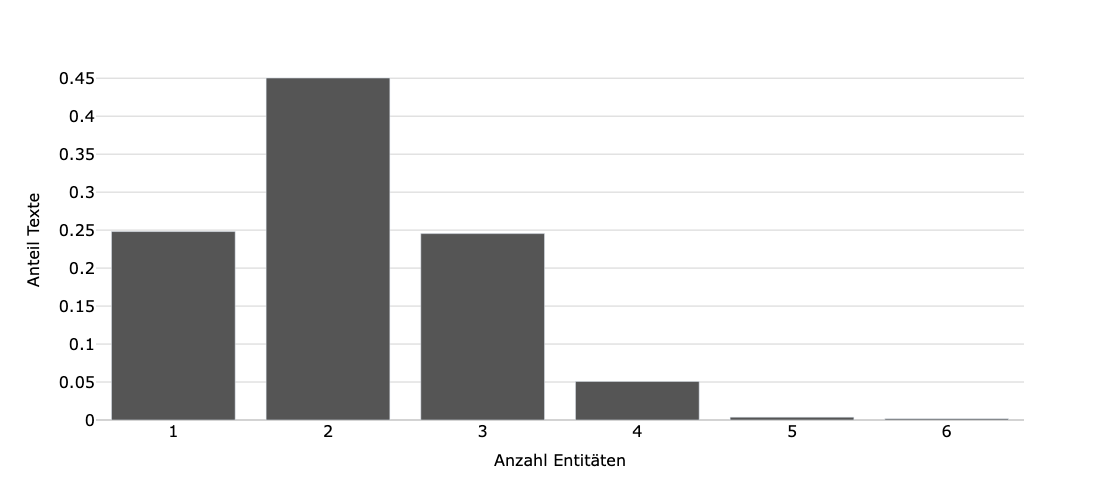

In [63]:
meta_plot = meta_anth['entity_count'].value_counts(normalize=True)

fig = px.bar(
    meta_plot,
    labels = {'value' : '<br>Anteil Texte', 'entity_count' : 'Anzahl Entitäten'},
    # color_discrete_sequence=["gray"]
)

fig.update_layout(
    width=900, height=500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    legend=dict(font = dict(size=16), traceorder = 'normal'),
    showlegend=False
)
fig = update_fig_for_publication(fig, make_grey=True)
fig.write_image(f"plots/6.5 Anzahl Entitäten.pdf")
fig.show()

In [14]:
main_feature = 'entity_count'

In [15]:
meta_anth_bin.corr(numeric_only=True)[main_feature].sort_values(ascending = False).head(20)

entity_count                     1.000000
entity_positiv                   0.398069
bekanntes_individuum_count       0.390660
kollektiv_count                  0.390625
entity_negativ                   0.382087
ballade                          0.341118
unbekanntes_individuum_count     0.334462
words                            0.324643
entity_neutral                   0.306401
sprechakt_erzaehlen_vorhanden    0.303150
ereignis                         0.301161
kollektiv_negativ                0.247066
in_hohem_mass_konkret            0.226377
konkretheit                      0.220873
wissen_ergaenzend                0.204284
bekanntes_individuum_negativ     0.165396
objektmarker_vorhanden           0.160960
marker_count                     0.134463
entity_ambivalent                0.133834
kleinraum_count                  0.114754
Name: entity_count, dtype: float64

In [16]:
meta_anth_bin.corr(numeric_only=True)[main_feature].sort_values(ascending = True).head(20)

zustand                           -0.332987
sprechakt_beschreiben_vorhanden   -0.229935
wissen_identisch                  -0.229154
nogenre                           -0.199152
sprechakt_behaupten_vorhanden     -0.190417
sprechinstanz_markiert            -0.163892
sprechakte_count                  -0.138117
geschichtsauffassung_positiv      -0.132598
neuzeit                           -0.131967
ueberlieferung_positiv            -0.128348
religion_positiv                  -0.126169
liebe_negativ                     -0.124568
year                              -0.122245
decade                            -0.119999
ende                              -0.109857
gegenwartsbezug                   -0.108620
politik_positiv                   -0.107572
sprechinstanz_in_vergangenheit    -0.107110
rollengedicht                     -0.102574
zeit_mitte                        -0.101660
Name: entity_count, dtype: float64

In [17]:
threshold = 0.3

bin_comp_features = get_features(meta_anth_bin.corr(numeric_only=True)[main_feature], threshold = threshold, mode = 'bin')
cont_comp_features = get_features(meta_anth_bin.corr(numeric_only=True)[main_feature], threshold = threshold, mode = 'cont')

In [18]:
results = relations_contbin(
    meta = meta_anth_bin, 
    main_feature = main_feature,
    comp_features = bin_comp_features
)

In [19]:
directly_related = [
    'entity_positiv', 'entity_negativ', 'entity_ambivalent', 'entity_neutral'
]
results_filtered = (
    results
    .query("index not in @directly_related")
    .query("mannwhitneyu_p < 0.05 and (pointbiserialr_corr >= @threshold or pointbiserialr_corr <= -@threshold)")
    .sort_values(by = 'pointbiserialr_corr', ascending = False)
)
round(results_filtered, 2)

,wenn entity_count = 0: Anteil Texte mit Feature = ...,wenn entity_count = 1: Anteil Texte mit Feature = ...,wenn entity_count = 2: Anteil Texte mit Feature = ...,wenn entity_count = 3: Anteil Texte mit Feature = ...,wenn entity_count > 3: Anteil Texte mit Feature = ...,pointbiserialr_corr,pointbiserialr_p,ttest_p,cohens_d,mannwhitneyu_stat,mannwhitneyu_p
ballade,0 [0/0],0.27233115468409586 [125/459],0.5846338535414166 [487/833],0.748898678414097 [340/454],0.8076923076923077 [84/104],0.34,0.0,0.0,-0.73,257511.0,0.0
sprechakt_erzaehlen_vorhanden,0 [0/0],0.5424836601307189 [249/459],0.7959183673469388 [663/833],0.9030837004405287 [410/454],0.9423076923076923 [98/104],0.30,0.0,0.0,-0.79,182174.0,0.0
ereignis,0 [0/0],0.5490196078431373 [252/459],0.8055222088835534 [671/833],0.9096916299559471 [413/454],0.9326923076923077 [97/104],0.30,0.0,0.0,-0.79,177223.0,0.0
zustand,0 [0/0],0.7037037037037037 [323/459],0.3817527010804322 [318/833],0.23348017621145375 [106/454],0.20192307692307693 [21/104],-0.33,0.0,0.0,0.72,574577.5,0.0


In [20]:
results_other = results.query("index not in @results_filtered.index")
round(results_other.sort_values(by='pointbiserialr_corr', ascending=False), 2)

,wenn entity_count = 0: Anteil Texte mit Feature = ...,wenn entity_count = 1: Anteil Texte mit Feature = ...,wenn entity_count = 2: Anteil Texte mit Feature = ...,wenn entity_count = 3: Anteil Texte mit Feature = ...,wenn entity_count > 3: Anteil Texte mit Feature = ...,pointbiserialr_corr,pointbiserialr_p,ttest_p,cohens_d,mannwhitneyu_stat,mannwhitneyu_p
entity_positiv,0 [0/0],0.5904139433551199 [271/459],0.45738295318127253 [381/833],0.33480176211453744 [152/454],0.21153846153846154 [22/104],0.40,0.00,0.87,-0.01,222969.0,0.75
entity_negativ,0 [0/0],0.0915032679738562 [42/459],0.28331332533013204 [236/833],0.3920704845814978 [178/454],0.25961538461538464 [27/104],0.38,0.00,0.00,-0.60,211593.5,0.00
entity_neutral,0 [0/0],0.2679738562091503 [123/459],0.28331332533013204 [236/833],0.29955947136563876 [136/454],0.22115384615384615 [23/104],0.31,0.00,0.00,-0.19,243110.5,0.00
kollektiv_negativ,0 [0/0],0.11764705882352941 [12/102],0.2587601078167116 [96/371],0.397887323943662 [113/284],0.5416666666666666 [39/72],0.25,0.00,0.00,-0.54,53095.5,0.00
bekanntes_individuum_negativ,0 [0/0],0.08118081180811808 [22/271],0.18252730109204368 [117/641],0.23466666666666666 [88/375],0.3375 [27/80],0.17,0.00,0.00,-0.43,110161.0,0.00
entity_ambivalent,0 [0/0],0.05010893246187364 [23/459],0.10684273709483794 [89/833],0.14977973568281938 [68/454],0.11538461538461539 [12/104],0.13,0.00,0.00,-0.35,125649.5,0.00
unbekanntes_individuum_positiv,0 [0/0],0.2702702702702703 [10/37],0.4090909090909091 [81/198],0.4473684210526316 [68/152],0.48936170212765956 [23/47],0.10,0.03,0.03,-0.21,20620.5,0.05
stoffgebiet_negativ,0 [0/0],0.19389978213507625 [89/459],0.22448979591836735 [187/833],0.2356828193832599 [107/454],0.34615384615384615 [36/104],0.09,0.00,0.00,-0.17,263262.0,0.01
unbekanntes_individuum_negativ,0 [0/0],0.10810810810810811 [4/37],0.16161616161616163 [32/198],0.18421052631578946 [28/152],0.23404255319148937 [11/47],0.08,0.11,0.11,-0.20,12090.5,0.13
bekanntes_individuum_positiv,0 [0/0],0.6752767527675276 [183/271],0.672386895475819 [431/641],0.7173333333333334 [269/375],0.75 [60/80],0.05,0.08,0.08,-0.11,189307.5,0.09


In [21]:
result_categories = ['pointbiserialr_corr', 'mannwhitneyu_p']

results_a = relations_contbin(
    meta = meta_anth_bin.query("1850 <= year <= 1884"), 
    main_feature = main_feature,
    comp_features = results_filtered.index
)

results_b = relations_contbin(
    meta = meta_anth_bin.query("1885 <= year <= 1918"), 
    main_feature = main_feature,
    comp_features = results_filtered.index
)

results_merged = results_a[result_categories].join(
    results_b[result_categories], 
    lsuffix='_1850', rsuffix = '_1885'
)
results_merged['diff_of_corrs'] = results_merged['pointbiserialr_corr_1885'] - results_merged['pointbiserialr_corr_1850']

round(results_merged.sort_values(by = 'diff_of_corrs'), 3)

,pointbiserialr_corr_1850,mannwhitneyu_p_1850,pointbiserialr_corr_1885,mannwhitneyu_p_1885,diff_of_corrs
ereignis,0.304,0.0,0.266,0.0,-0.038
sprechakt_erzaehlen_vorhanden,0.308,0.0,0.271,0.0,-0.037
zustand,-0.320,0.0,-0.337,0.0,-0.017
ballade,0.327,0.0,0.337,0.0,0.010


In [22]:
results = relations_contbin_ratings(meta_anth_bin, main_feature)
round(results.sort_values(by = 'pointbiserialr_corr'), 2)

  0%|          | 0/14 [00:00<?, ?it/s]

,wenn entity_count = 1: Anteil mit Feature = ...,wenn entity_count = 2: Anteil mit Feature = ...,wenn entity_count = 3: Anteil mit Feature = ...,wenn entity_count = 4: Anteil mit Feature = ...,pointbiserialr_corr,pointbiserialr_p,mannwhitneyu_stat,mannwhitneyu_p
bekanntes_individuum_positiv,0.6753 [183/271],0.5681 [517/910],0.5368 [357/665],0.525 [84/160],-0.07,0.00,460867.0,0.00
entity_positiv,0.5904 [271/459],0.4832 [805/1666],0.4427 [603/1362],0.4415 [166/376],-0.07,0.00,1755160.0,0.00
stoffgebiet_positiv,0.5122 [315/615],0.4656 [535/1149],0.4416 [276/625],0.3897 [53/136],-0.06,0.00,748314.5,0.00
kollektiv_positiv,0.5098 [52/102],0.3661 [160/437],0.3342 [133/398],0.4054 [45/111],-0.05,0.11,124671.5,0.09
stoffgebiet_neutral,0.2049 [126/615],0.188 [216/1149],0.1808 [113/625],0.1985 [27/136],-0.03,0.21,480498.5,0.25
entity_ambivalent,0.0501 [23/459],0.0642 [107/1666],0.0705 [96/1362],0.0452 [17/376],-0.00,0.76,449486.0,0.93
unbekanntes_individuum_negativ,0.1081 [4/37],0.1311 [32/244],0.1319 [31/235],0.1313 [13/99],-0.00,0.91,22214.0,0.97
entity_neutral,0.268 [123/459],0.3001 [500/1666],0.3018 [411/1362],0.2926 [110/376],0.00,0.76,1612919.5,0.58
stoffgebiet_ambivalent,0.1024 [63/615],0.1401 [161/1149],0.1552 [97/625],0.1176 [16/136],0.03,0.08,397031.0,0.03
unbekanntes_individuum_positiv,0.2703 [10/37],0.3484 [85/244],0.3447 [81/235],0.3232 [32/99],0.04,0.28,46145.5,0.55


In [23]:
results = relations_contcont(
    meta = meta_anth_bin, 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

In [24]:
results

,wenn entity_count = 0: Mittelwert Feature = ...,wenn entity_count = 1: Mittelwert Feature = ...,wenn entity_count = 2: Mittelwert Feature = ...,wenn entity_count = 3: Mittelwert Feature = ...,wenn entity_count > 3: Mittelwert Feature = ...,pearsonr_corr,pearsonr_p
bekanntes_individuum_count,NaN,0.590414,1.092437,1.464758,1.721154,0.390660,1.666472e-68
words,NaN,242.457275,292.849614,369.071942,550.726316,0.324643,1.412541e-43
unbekanntes_individuum_count,NaN,0.080610,0.292917,0.517621,1.105769,0.334462,1.370560e-49
kollektiv_count,NaN,0.222222,0.524610,0.876652,1.221154,0.390625,1.718298e-68


In [25]:
px.box(
    meta_anth_bin,
    x = 'entity_count',
    y = 'words',
    hover_data = ['author', 'title'],
    labels = {'words' : 'Textlänge in Wörtern', 'entity_count' : 'Anzahl Entitäten'},
    points = 'all'
)

In [26]:
result_categories = ['pearsonr_corr', 'pearsonr_p']

results_a = relations_contcont(
    meta = meta_anth_bin.query("1850 <= year <= 1884"), 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

results_b = relations_contcont(
    meta = meta_anth_bin.query("1885 <= year <= 1918"), 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

results_merged = results_a[result_categories].join(
    results_b[result_categories], 
    lsuffix='_1850', rsuffix = '_1885'
)
results_merged['diff_of_corrs'] = results_merged['pearsonr_corr_1885'] - results_merged['pearsonr_corr_1850']

round(results_merged.sort_values(by = 'diff_of_corrs'), 3)

,pearsonr_corr_1850,pearsonr_p_1850,pearsonr_corr_1885,pearsonr_p_1885,diff_of_corrs
bekanntes_individuum_count,0.416,0.0,0.278,0.0,-0.138
kollektiv_count,0.407,0.0,0.319,0.0,-0.088
words,0.316,0.0,0.316,0.0,-0.000
unbekanntes_individuum_count,0.300,0.0,0.473,0.0,0.173


In [27]:
meta_plot = ts[[
    '1_entity_share_smoothed', 
    '2_entity_share_smoothed', 
    '3_entity_share_smoothed',
    '4_entity_share_smoothed'
]]
meta_plot.columns = [
    'Text mit einer Entität', 
    'Text mit zwei Entitäten', 
    'Text mit drei Entitäten',
    'Text mit vier<br>oder mehr Entitäten'
]
# save_ts_data(meta_plot, prefix='Anzahl_Entitaeten_')

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil an Texten',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['1_entity_share', '2_entity_share', '3_entity_share', '4_entity_share']
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Anzahl Entitäten im Zeitverlauf (differenziert).pdf")
fig.show()

In [28]:
meta_plot = ts[['total_entity_count_smoothed']]
meta_plot.columns = ['Entitäten pro Text']
# save_ts_data(meta_plot)

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Mittelwert Entitäten pro Text',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['entity_count_mean']
)
fig.update_layout(yaxis_range=[0.9, 2.5])
fig = update_fig_for_publication(fig, make_grey=True)
fig.write_image(f"plots/6.5 Anzahl Entitäten im Zeitverlauf (gesamt).pdf")
fig.show()

In [29]:
# Nur Balladen
meta_test = meta_anth_bin.query("ballade == 1")

early = meta_test.query("1850 <= year <= 1884")['entity_count']
late = meta_test.query("1885 <= year <= 1918")['entity_count']
mannwhitneyu_results = mannwhitneyu(early, late)

print(f"1850–1884 : {len(early)} Texte. Mean entity_count = {early.mean()}")
print(f"1885–1918 : {len(late)} Texte. Mean entity_count = {late.mean()}")
print(f"mannwhitney_u p = {mannwhitneyu_results[1]}")

1850–1884 : 812 Texte. Mean entity_count = 2.4051724137931036
1885–1918 : 224 Texte. Mean entity_count = 2.2767857142857144
mannwhitney_u p = 0.02147667981898758


In [30]:
# Nur gleiche Textlänge
length_bins = [(0, 100), (101, 200), (201, 300), (301, 400), (401, 99999)]
for length_bin in length_bins:
    min_length = length_bin[0]
    max_length = length_bin[1]
    meta_length = meta_anth_bin.query("@min_length <= words <= @max_length")
    
    early = meta_length.query("1850 <= year <= 1884")['entity_count']
    late = meta_length.query("1885 <= year <= 1918")['entity_count']
    mannwhitneyu_results = mannwhitneyu(early, late)

    print(f"{min_length}–{max_length} words")
    print(f"1850–1884 : {len(early)} Texte. Mean entity_count = {early.mean()}")
    print(f"1885–1918 : {len(late)} Texte. Mean entity_count = {late.mean()}")
    print(f"mannwhitney_u p = {mannwhitneyu_results[1]}")
    print("\n")


0–100 words
1850–1884 : 86 Texte. Mean entity_count = 1.744186046511628
1885–1918 : 67 Texte. Mean entity_count = 1.5970149253731343
mannwhitney_u p = 0.20132660417501014


101–200 words
1850–1884 : 282 Texte. Mean entity_count = 1.950354609929078
1885–1918 : 145 Texte. Mean entity_count = 1.7655172413793103
mannwhitney_u p = 0.01845252254663496


201–300 words
1850–1884 : 298 Texte. Mean entity_count = 2.0738255033557045
1885–1918 : 123 Texte. Mean entity_count = 1.9593495934959348
mannwhitney_u p = 0.1798167179883755


301–400 words
1850–1884 : 225 Texte. Mean entity_count = 2.2533333333333334
1885–1918 : 75 Texte. Mean entity_count = 2.066666666666667
mannwhitney_u p = 0.09932173278726612


401–99999 words
1850–1884 : 330 Texte. Mean entity_count = 2.503030303030303
1885–1918 : 92 Texte. Mean entity_count = 2.402173913043478
mannwhitney_u p = 0.19640701343661437




# Typen

In [31]:
meta_plot = ts[[
    'bekanntes_individuum_share_smoothed', 
    'unbekanntes_individuum_share_smoothed', 
    'kollektiv_share_smoothed',
    'nichtmensch_share_smoothed'
]]
meta_plot.columns = [
    'Bekanntes Individuum', 
    'Unbekanntes Individuum', 
    'Kollektiv',
    'Nicht-menschliche Entität'
]
save_ts_data(meta_plot, prefix = '06_05_Entitaeten_')

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil an Entitäten',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['bekanntes_individuum_share', 'unbekanntes_individuum_share', 'kollektiv_share', 'nichtmensch_share']
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Entitätentypen im Zeitverlauf.pdf")
fig.show()

#### Anstieg bekannte Individuen ab 1905

In [32]:
meta_time = meta_anth.query("year >= 1905").copy()
top_authors_df = pd.DataFrame()
for author in meta_time['author']:
    meta_author = meta_time.query("author == @author")
    top_authors_df.loc[author, 'text_count'] = meta_author.shape[0]
    top_authors_df.loc[author, 'entity_count'] = meta_author['entity_count'].sum()
    top_authors_df.loc[author, 'bekannes_individuum_share'] = ''.join(meta_author['entity_simple']).count("1")/meta_author['entity_count'].sum()
    
top_authors_df.query("entity_count >= 10").sort_values(by = 'bekannes_individuum_share', ascending=False)

,text_count,entity_count,bekannes_individuum_share
"Blunck, Hans Friedrich",6.0,14.0,0.714286
"Lissauer, Ernst",15.0,22.0,0.545455
"Gaudy, Alice von",5.0,15.0,0.533333
"Schrutz, Demetrius",10.0,21.0,0.476190
"Schüler, Gustav",7.0,14.0,0.357143
"Geißler, Max",11.0,18.0,0.333333
"Hohlbaum, Robert",6.0,12.0,0.333333
"Weber, Ernst",7.0,19.0,0.263158
"Münchhausen, Börries von",9.0,15.0,0.200000
"Löns, Hermann",7.0,16.0,0.062500


#### Kollektiv-Entitäten in Ergänzungskorpus 'Kanonisierte Moderne'

In [33]:
meta_modcanon_bin = binarize_meta(meta_modcanon)
results = pd.DataFrame({
    'texts' : meta_modcanon_bin.groupby('author').size(),
    'entities' : meta_modcanon_bin.groupby('author')['entity_count'].sum(),
    'kollektiv_abs' : meta_modcanon_bin.groupby('author')['kollektiv_count'].sum(),
})
results['kollektiv_rel'] = results['kollektiv_abs']/results['entities']
results

,texts,entities,kollektiv_abs,kollektiv_rel
author,,,,
"George, Stefan",16,27,12,0.444444
"Heym, Georg",43,78,44,0.564103
"Hofmannsthal, Hugo von",8,11,3,0.272727
"Rilke, Rainer Maria",46,87,23,0.264368


In [34]:
meta_modcanon_ratings.query("author == 'Heym, Georg' and type == '3'")['full'].value_counts().head()

full
Perser/Soldaten          15
Griechen/Soldaten         7
Franzosen/Soldaten        3
Tote                      2
Pariser Revolutionäre     1
Name: count, dtype: int64

#### Häufigste Entitäten

In [35]:
top_bekannte_individuen = meta_anth_ratings.query("type=='1'")['full'].value_counts()
top_bekannte_individuen = pd.DataFrame(top_bekannte_individuen)
top_bekannte_individuen = top_bekannte_individuen.rename(columns={'full':'count'})
top_bekannte_individuen.query("count >= 10")

,count
full,
Friedrich der Große,67
Martin Luther,50
Wilhelm I. (Deutsches Reich),48
Karl der Große,47
Friedrich I. Barbarossa,31
Napoleon Bonaparte,25
Karl V. (HRR),22
Friedrich Wilhelm (Brandenburg),20
Ulrich von Hutten,19


In [36]:
top_unbekannte_individuen = ' XXX '.join(meta_anth_ratings.query("type=='2'")['full'])
top_unbekannte_individuen = re.sub("/", " XXX ", top_unbekannte_individuen)
top_unbekannte_individuen = top_unbekannte_individuen.split(" XXX ")
top_unbekannte_individuen = pd.Series(top_unbekannte_individuen).value_counts()
top_unbekannte_individuen = pd.DataFrame(top_unbekannte_individuen)
top_unbekannte_individuen = top_unbekannte_individuen.rename(columns={0:'count'})
top_unbekannte_individuen.query("count >= 10")

,count
Soldat,112
Frau,55
Geistlicher,42
Mann,32
Alte Person,28
Junge Person,27
Deutscher,26
Sprechinstanz,21
Ritter,21
Bauer,20


In [37]:
top_kollektive = ' XXX '.join(meta_anth_ratings.query("type=='3'")['full'])
top_kollektive = re.sub("/", " XXX ", top_kollektive)
top_kollektive = top_kollektive.split(" XXX ")
top_kollektive = pd.Series(top_kollektive).value_counts()
top_kollektive = pd.DataFrame(top_kollektive)
top_kollektive = top_kollektive.rename(columns={0:'count'})
top_kollektive.query("count >= 10")

,count
Soldaten,289
Deutsche,150
Stadtbevölkerung,57
Römer,47
Österreicher,42
Menschen,34
Preußen,31
Schweizer,31
Franzosen,30
Bauern,25


In [38]:
# Top bekannte Individuen ohne C. F. Meyer
top_bekannte_individuen = meta_anth_ratings.query("author != 'Meyer, Conrad Ferdinand' and type=='1'")['full'].value_counts()
top_bekannte_individuen = pd.DataFrame(top_bekannte_individuen)
top_bekannte_individuen = top_bekannte_individuen.rename(columns={'full':'count'})
top_bekannte_individuen.head(5)

,count
full,
Friedrich der Große,67
Martin Luther,48
Wilhelm I. (Deutsches Reich),48
Karl der Große,47
Friedrich I. Barbarossa,31


In [39]:
# Sample 100 bekannte Individuen
# top_bekannte_individuen.sample(n=100).to_csv("plots/6.5 bekannte_individuen_sample.csv")

In [40]:
# Bekannte Individuen, die min. 3 mal vorkommen
top_bekannte_individuen = meta_anth_ratings.query("type=='1'")['full'].value_counts()
top_bekannte_individuen = pd.DataFrame(top_bekannte_individuen)
top_bekannte_individuen = top_bekannte_individuen.rename(columns={'full':'count'})
top_bekannte_individuen_list = top_bekannte_individuen.query("count >= 4").index.tolist()

print(len(top_bekannte_individuen_list))
print(' | '.join(top_bekannte_individuen.query("count >= 4").index.tolist()))

92
Friedrich der Große | Martin Luther | Wilhelm I. (Deutsches Reich) | Karl der Große | Friedrich I. Barbarossa | Napoleon Bonaparte | Karl V. (HRR) | Friedrich Wilhelm (Brandenburg) | Ulrich von Hutten | Otto I. (HRR) | Konrad IV. (Schwaben) | Otto von Bismarck | Luise von Mecklenburg-Strelitz | Maximilian I. (HRR) | Heinrich IV. (HRR) | Heinrich I. (Ostfrankenreich) | Friedrich II. (HRR) | Ludwig IV. (HRR) | Maria Theresia | Widukind (Sachsen) | Napoleon III. | Helmuth von Moltke | Joseph II. | Heinrich der Löwe | Gaius Iulius Caesar | Friedrich III. (Deutsches Reich) | Franz Joseph I. | Rudolf I. (HRR) | Eugen von Savoyen | Gebhard Leberecht von Blücher | Karl I. (Neapel) | Johann T’Serclaes von Tilly | Manfred (Sizilien) | Friedrich der Schöne | Alarich | Wallenstein | Attila | Friedrich I. (Brandenburg) | Gustav Adolf | Friedrich Wilhelm IV. | Johannes Gutenberg | Friedrich Wilhelm III. (Preußen) | Alexander der Große | Philipp I. (Hessen) | Alboin | Friedrich Wilhelm I. (Preußen

In [41]:
print(f"Unbekanntes Individuum 'Soldat'   : {list(top_unbekannte_individuen.loc['Soldat']/top_unbekannte_individuen.sum())[0]}")
print(f"Kollektiv              'Soldaten' : {list(top_kollektive.loc['Soldaten']/top_kollektive.sum())[0]}")

Unbekanntes Individuum 'Soldat'   : 0.12134344528710726
Kollektiv              'Soldaten' : 0.18585209003215433


# Bewertung

In [42]:
def create_rating_barplot(min_count, rating_df, label):
    meta_plot = rating_df.query("count >= @min_count").sort_values(by='positiv')
    
    fig = px.bar(
        meta_plot,
        title = f"Anzahl {label} Count >= {min_count} : {meta_plot.shape[0]}",
        y = ['neutral', 'positiv', 'negativ', 'ambivalent'],
        hover_data = ['count'],
        labels={'value' : 'Anteil', 'index' : '', 'variable' : ''}
    )
    
    fig.update_layout(height=600, width=1000)
    if min_count <= 5:
        fig.update_layout(width=1200)
        
    fig.show()

### Ohne Zeitverlauf

In [43]:
results = (
    meta_anth_ratings
    .query("type!='4'")
    .groupby('type')['rating']
    .value_counts(normalize=True)
    .to_frame()
    .reset_index()
    .sort_values(by=['type', 'rating'])
)
add = (
    meta_anth_ratings['rating'].value_counts(normalize=True)
    .to_frame().reset_index()
    .sort_values(by='rating')
)
add['type'] = 'Alle Entitäten'
results = pd.concat([add, results])

results['type'] = results['type'].replace({
    '1' : 'Bekannte Individuen',
    '2' : 'Unbekannte Individuen',
    '3' : 'Kollektive',
    '4' : 'Nicht-menschliche Entitäten',
})
results['rating'] = results['rating'].replace({
    '0' : 'neutral',
    '1' : 'positiv',
    '2' : 'negativ',
    '3' : 'ambivalent',
})
fig = px.bar(
    results,
    x='type',
    y='proportion',
    color='rating',
    barmode='group',
    labels={'type':'','proportion':'Anteil', 'rating':''}
)
fig.update_layout(
    width=950, height=500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    legend=dict(font = dict(size=16), traceorder = 'normal', x = 0.8, y = 0.97),
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Entitätenbewertung im Anthologiekorpus.pdf")
fig.show()

In [44]:
top_bekannte_individuen_list = top_bekannte_individuen.query("count >= 5").index.tolist()
top_bekannte_individuen_ratings = pd.DataFrame(index = top_bekannte_individuen_list)
for entity in top_bekannte_individuen_list:
    this_ratings = meta_anth_ratings.query("full == @entity")
    top_bekannte_individuen_ratings.at[entity, 'count'] = this_ratings.shape[0]
    top_bekannte_individuen_ratings.at[entity, 'neutral'] = this_ratings.query("rating=='0'").shape[0]/this_ratings.shape[0]
    top_bekannte_individuen_ratings.at[entity, 'positiv'] = this_ratings.query("rating=='1'").shape[0]/this_ratings.shape[0]
    top_bekannte_individuen_ratings.at[entity, 'negativ'] = this_ratings.query("rating=='2'").shape[0]/this_ratings.shape[0]
    top_bekannte_individuen_ratings.at[entity, 'ambivalent'] = this_ratings.query("rating=='3'").shape[0]/this_ratings.shape[0]

create_rating_barplot(min_count=10, rating_df = top_bekannte_individuen_ratings, label='Bekannte Individuen')
create_rating_barplot(min_count=5, rating_df = top_bekannte_individuen_ratings, label='Bekannte Individuen')

In [45]:
top_unbekannte_individuen_list = top_unbekannte_individuen.query("count >= 5").index.tolist()
top_unbekannte_individuen_ratings = pd.DataFrame(index = top_unbekannte_individuen_list)
for entity in top_unbekannte_individuen_list:
    this_index = [x for x in meta_anth_ratings.query("type=='2'").index if entity in meta_anth_ratings.loc[x]['full'].split("/")]
    this_ratings = meta_anth_ratings.loc[this_index]
    
    top_unbekannte_individuen_ratings.at[entity, 'count'] = this_ratings.shape[0]
    top_unbekannte_individuen_ratings.at[entity, 'neutral'] = this_ratings.query("rating=='0'").shape[0]/this_ratings.shape[0]
    top_unbekannte_individuen_ratings.at[entity, 'positiv'] = this_ratings.query("rating=='1'").shape[0]/this_ratings.shape[0]
    top_unbekannte_individuen_ratings.at[entity, 'negativ'] = this_ratings.query("rating=='2'").shape[0]/this_ratings.shape[0]
    top_unbekannte_individuen_ratings.at[entity, 'ambivalent'] = this_ratings.query("rating=='3'").shape[0]/this_ratings.shape[0]

create_rating_barplot(min_count=10, rating_df = top_unbekannte_individuen_ratings, label='Unbekannte Individuen')
create_rating_barplot(min_count=5, rating_df = top_unbekannte_individuen_ratings, label='Unbekannte Individuen')

In [46]:
top_kollektive_list = top_kollektive.query("count >= 5").index.tolist()
top_kollektive_ratings = pd.DataFrame(index = top_kollektive_list)
for entity in top_kollektive_list:
    this_index = [x for x in meta_anth_ratings.query("type=='3'").index if entity in meta_anth_ratings.loc[x]['full'].split("/")]
    this_ratings = meta_anth_ratings.loc[this_index]
    
    top_kollektive_ratings.at[entity, 'count'] = this_ratings.shape[0]
    top_kollektive_ratings.at[entity, 'neutral'] = this_ratings.query("rating=='0'").shape[0]/this_ratings.shape[0]
    top_kollektive_ratings.at[entity, 'positiv'] = this_ratings.query("rating=='1'").shape[0]/this_ratings.shape[0]
    top_kollektive_ratings.at[entity, 'negativ'] = this_ratings.query("rating=='2'").shape[0]/this_ratings.shape[0]
    top_kollektive_ratings.at[entity, 'ambivalent'] = this_ratings.query("rating=='3'").shape[0]/this_ratings.shape[0]

create_rating_barplot(min_count=10, rating_df = top_kollektive_ratings, label='Kollektive')
create_rating_barplot(min_count=5, rating_df = top_kollektive_ratings, label='Kollektive')

In [47]:
deutsch = [
    'Deutsche', 'Österreicher', 'Schweizer', 'Sachsen', 'Preußen', 'Germanen', 'Schleswig-Holsteiner',
    'Dithmarscher', 'Bayern', 'Brandenburger'
] # Goten, Tiroler, Franken, Quitzows, Wien
nichtdeutsch = [
    'Römer', 'Franzosen', 'Griechen', 'Türken', 'Hunnen', 'Ungarn', 'Schweden', 'Russen', 'Dänen', 'Welsche'
] # Athen
top_kollektive_ratings['Sprache'] = ['deutschsprachig' if x in deutsch else 'nicht deutschsprachig' if x in nichtdeutsch else float('NaN') for x in top_kollektive_ratings.index]

fig = px.box(
    top_kollektive_ratings.query("Sprache.notna()"),
    y = 'negativ',
    color = 'Sprache',
    points = 'all',
    hover_data = [top_kollektive_ratings.query("Sprache.notna()").index],
    labels = {'negativ' : 'Anteil negative Bewertung'}
)
fig.show()

fig = px.box(
    top_kollektive_ratings.query("Sprache.notna()"),
    y = 'positiv',
    color = 'Sprache',
    points = 'all',
    hover_data = [top_kollektive_ratings.query("Sprache.notna()").index],
    labels = {'positiv' : 'Anteil positive Bewertung'}
)
fig.show()

### Mit Zeitverlauf

In [48]:
meta_plot = ts[[
    'entity_neutral_share_smoothed', 
    'entity_positiv_share_smoothed', 
    'entity_negativ_share_smoothed',
    'entity_ambivalent_share_smoothed'
]]
meta_plot.columns = [
    'neutral', 
    'positiv', 
    'negativ',
    'ambivalent'
]
# save_ts_data(meta_plot)

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil an Entitäten-Bewertungen',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['entity_neutral_share', 'entity_positiv_share', 'entity_negativ_share', 'entity_ambivalent_share']
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Entitätenbewertung im Zeitverlauf.pdf")
fig.show()

In [49]:
meta_ballads = meta_anth.query("gattung.str.contains('Ballade', na = False)").copy()
meta_ballads['negative_entity_count'] = [x.count("2") for x in meta_ballads['entity_bewertung']]
meta_ballads['negative_entity_share'] = meta_ballads['negative_entity_count']/meta_ballads['entity_count']
meta_ballads['stoffgebiet_count'] = [x.count("+")+1 for x in meta_ballads['stoffgebiet']]
meta_ballads['negative_stoffgebiet_count'] = [x.count("2") for x in meta_ballads['stoffgebiet_bewertung']]
meta_ballads['negative_stoffgebiet_share'] = meta_ballads['negative_stoffgebiet_count']/meta_ballads['stoffgebiet_count']

results = pd.DataFrame({
    'negative_entity_share' : meta_ballads.groupby('decade')['negative_entity_share'].mean(),
    'negative_stoffgebiet_share' : meta_ballads.groupby('decade')['negative_stoffgebiet_share'].mean(),
})
results

,negative_entity_share,negative_stoffgebiet_share
decade,,
1850.0,0.172016,0.179054
1860.0,0.199735,0.273810
1870.0,0.149568,0.164940
1880.0,0.170139,0.247222
1890.0,0.222222,0.343137
1900.0,0.223214,0.253968
1910.0,0.131250,0.225000


In [50]:
meta_plot = ts[[
    'bekanntes_individuum_neutral_share_smoothed', 
    'bekanntes_individuum_positiv_share_smoothed', 
    'bekanntes_individuum_negativ_share_smoothed',
    'bekanntes_individuum_ambivalent_share_smoothed'
]]
meta_plot.columns = [
    'neutral', 
    'positiv', 
    'negativ',
    'ambivalent'
]
# save_ts_data(meta_plot)

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil an Bekannte-Individuen-Bewertungen',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['bekanntes_individuum_neutral_share', 'bekanntes_individuum_positiv_share', 'bekanntes_individuum_negativ_share', 'bekanntes_individuum_ambivalent_share']
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Bewertung bekannter Individuen im Zeitverlauf.pdf")
fig.show()

In [51]:
meta_plot = ts[[
    'unbekanntes_individuum_neutral_share_smoothed', 
    'unbekanntes_individuum_positiv_share_smoothed', 
    'unbekanntes_individuum_negativ_share_smoothed',
    'unbekanntes_individuum_ambivalent_share_smoothed'
]]
meta_plot.columns = [
    'neutral', 
    'positiv', 
    'negativ',
    'ambivalent'
]
# save_ts_data(meta_plot)

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil an Unbekannte-Individuen-Bewertungen',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['unbekanntes_individuum_neutral_share', 'unbekanntes_individuum_positiv_share', 'unbekanntes_individuum_negativ_share', 'unbekanntes_individuum_ambivalent_share']
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Bewertung unbekannter Individuen im Zeitverlauf.pdf")
fig.show()

In [52]:
meta_plot = ts[[
    'kollektiv_neutral_share_smoothed', 
    'kollektiv_positiv_share_smoothed', 
    'kollektiv_negativ_share_smoothed',
    'kollektiv_ambivalent_share_smoothed'
]]
meta_plot.columns = [
    'neutral', 
    'positiv', 
    'negativ',
    'ambivalent'
]
# save_ts_data(meta_plot)

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil an Kollektiv-Bewertungen',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['kollektiv_neutral_share', 'kollektiv_positiv_share', 'kollektiv_negativ_share', 'kollektiv_ambivalent_share']
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.5 Bewertung Kollektive im Zeitverlauf.pdf")
fig.show()

In [53]:
results = pd.DataFrame()
entity_data_list = [
    ['total_entity_count', 'entity_positiv_count', 'entity_neutral_count', 'Alle Entitäten'],
    ['bekanntes_individuum_count', 'bekanntes_individuum_positiv_count', 'bekanntes_individuum_neutral_count', 'Bekanntes Individuum'],
    ['unbekanntes_individuum_count', 'unbekanntes_individuum_positiv_count', 'unbekanntes_individuum_neutral_count', 'Unbekanntes Individuum'],
    ['kollektiv_count', 'kollektiv_positiv_count', 'kollektiv_neutral_count', 'Kollektiv'],
]

for entity_data in entity_data_list:
    label = entity_data[3]
    early_count = ts.loc[1850:1884][entity_data[0]].sum()
    early_neutral = ts.loc[1850:1884][entity_data[2]].sum()
    early_positiv = ts.loc[1850:1884][entity_data[1]].sum()
    late_count = ts.loc[1885:1918][entity_data[0]].sum()
    late_neutral = ts.loc[1885:1918][entity_data[2]].sum()
    late_positiv = ts.loc[1885:1918][entity_data[1]].sum()

    contingency_table_neutral = [
        [early_neutral, early_count-early_neutral],
        [late_neutral, late_count-late_neutral]]
    chi2_neutral = chi2_contingency(contingency_table_neutral)

    contingency_table_positiv = [
        [early_positiv, early_count-early_positiv],
        [late_positiv, late_count-late_positiv]]
    chi2_positiv = chi2_contingency(contingency_table_positiv)

    results.at[label, 'early_count'] = early_count
    results.at[label, 'early_neutral'] = early_neutral
    results.at[label, 'early_neutral_share'] = early_neutral/early_count
    results.at[label, 'early_positiv'] = early_positiv
    results.at[label, 'early_positiv_share'] = early_positiv/early_count
    results.at[label, 'late_count'] = late_count
    results.at[label, 'late_neutral'] = late_neutral
    results.at[label, 'late_neutral_share'] = late_neutral/late_count
    results.at[label, 'late_positiv'] = late_positiv
    results.at[label, 'late_positiv_share'] = late_positiv/late_count

    results.at[label, 'neutral_chi'] = chi2_neutral[0]
    results.at[label, 'neutral_chi_p'] = chi2_neutral[1]

    results.at[label, 'positiv_chi'] = chi2_positiv[0]
    results.at[label, 'positiv_chi_p'] = chi2_positiv[1]

In [54]:
round(results[[x for x in results.columns if 'positiv' not in x]], 3)

,early_count,early_neutral,early_neutral_share,late_count,late_neutral,late_neutral_share,neutral_chi,neutral_chi_p
Alle Entitäten,2932.0,793.0,0.270,984.0,364.0,0.370,34.532,0.000
Bekanntes Individuum,1576.0,342.0,0.217,449.0,117.0,0.261,3.541,0.060
Unbekanntes Individuum,386.0,174.0,0.451,245.0,129.0,0.527,3.149,0.076
Kollektiv,825.0,236.0,0.286,239.0,97.0,0.406,11.818,0.001


In [55]:
round(results[[x for x in results.columns if 'neutral' not in x]], 3)

,early_count,early_positiv,early_positiv_share,late_count,late_positiv,late_positiv_share,positiv_chi,positiv_chi_p
Alle Entitäten,2932.0,1467.0,0.500,984.0,404.0,0.411,23.438,0.000
Bekanntes Individuum,1576.0,927.0,0.588,449.0,225.0,0.501,10.453,0.001
Unbekanntes Individuum,386.0,145.0,0.376,245.0,72.0,0.294,4.086,0.043
Kollektiv,825.0,311.0,0.377,239.0,85.0,0.356,0.275,0.600


In [56]:
fig = px.bar(
    ts,
    y = 'kollektiv_count',
    labels = {'kollektiv_count' : 'Anzahl Kollektiv-Entitäten', 'year' : ''}
)
fig.show()

In [57]:
authortitles = meta_anth.query("1897 <= year <= 1900")['author_title']
meta_anth_ratings['author_title'] = meta_anth_ratings['author'] + ' – ' + meta_anth_ratings['title']
results = meta_anth_ratings.query("author_title.isin(@authortitles) and type=='3'")
results = results.sort_values(by= ['rating', 'full'])[[
    'author', 'title', 'full', 'type', 'rating'
]]
print(results.shape[0])
results

28


,author,title,full,type,rating
3471,"Rüthning, Paul",Der Überfall,Attentäter,3,0
2568,"Münchhausen, Börries von",Bauernaufstand,Bauern,3,0
3638,"Miegel, Agnes",Herzog Samo,Boten,3,0
3167,"Wildenbruch, Ernst von",Inschrift an Villa Zirio in San Remo,Deutsche,3,0
3560,"Miegel, Agnes",Die Staufen,Deutsche,3,0
3852,"Dahn, Felix",Das neunzehnte Jahrhundert,Deutsche,3,0
3133,"Münchhausen, Börries von",Der Abschied zu Fontainebleau,Franzosen/Soldaten,3,0
3636,"Miegel, Agnes",Herzog Samo,Kinder,3,0
2836,"Eckstein, Ernst",Nächtliche Stimmen,Menschen/Sklaven/Gegenwart,3,0
3412,"Frey, Adolf",Die Kappelkämpfer,Schweizer/Soldaten,3,0


### Weiteres

In [58]:
meta_heroism = meta_anth_bin.copy()
meta_heroism['bekanntes_individuum_vorhanden'] = [1 if x > 0 else 0 for x in meta_heroism['bekanntes_individuum_count']]
meta_heroism['unbekanntes_individuum_vorhanden'] = [1 if x > 0 else 0 for x in meta_heroism['unbekanntes_individuum_count']]
meta_heroism['kollektiv_vorhanden'] = [1 if x > 0 else 0 for x in meta_heroism['kollektiv_count']]
meta_heroism['bekanntes_individuum_positiv'] = meta_heroism['bekanntes_individuum_positiv'].replace({float('NaN'):0})
meta_heroism['unbekanntes_individuum_positiv'] = meta_heroism['unbekanntes_individuum_positiv'].replace({float('NaN'):0})
meta_heroism['kollektiv_positiv'] = meta_heroism['kollektiv_positiv'].replace({float('NaN'):0})

results = pd.DataFrame()
for this_main_feature in ['bekanntes_individuum_vorhanden', 
                          'unbekanntes_individuum_vorhanden', 
                          'kollektiv_vorhanden',
                          'bekanntes_individuum_positiv', 
                          'unbekanntes_individuum_positiv', 
                          'kollektiv_positiv',
                         ]:
    this_results = relations_binbin(
        meta = meta_heroism, 
        main_feature = this_main_feature,
        comp_features = ['heroismus']
    )
    this_results['main_feature'] = this_main_feature
    results = pd.concat([results, this_results])

In [59]:
round(results[['main_feature'] + [x for x in results.columns]], 3)

,main_feature,wenn_nicht,wenn_nicht_detail,wenn_ja,wenn_ja_detail,diff_low_bootstrap,diff_low,diff,diff_high,diff_high_bootstrap,chi2,chi2_p,fisher_p,phi,min_real,min_expected,main_feature
heroismus,bekanntes_individuum_vorhanden,0.207,100/483,0.309,423/1367,0.058,0.059,0.102,0.146,0.144,18.454,0.000,0.000,0.100,100.0,136.545,bekanntes_individuum_vorhanden
heroismus,unbekanntes_individuum_vorhanden,0.308,436/1416,0.200,87/434,-0.152,-0.152,-0.107,-0.063,-0.064,18.913,0.000,0.000,0.101,87.0,122.693,unbekanntes_individuum_vorhanden
heroismus,kollektiv_vorhanden,0.261,266/1021,0.310,257/829,0.011,0.008,0.049,0.091,0.088,5.525,0.019,0.020,0.055,257.0,234.361,kollektiv_vorhanden
heroismus,bekanntes_individuum_positiv,0.165,150/907,0.396,373/943,0.192,0.191,0.230,0.270,0.272,120.781,0.000,0.000,0.256,150.0,256.411,bekanntes_individuum_positiv
heroismus,unbekanntes_individuum_positiv,0.276,460/1668,0.346,63/182,-0.001,-0.002,0.070,0.143,0.140,4.008,0.045,0.056,0.047,63.0,51.452,unbekanntes_individuum_positiv
heroismus,kollektiv_positiv,0.248,369/1489,0.427,154/361,0.118,0.123,0.179,0.234,0.235,45.795,0.000,0.000,0.157,154.0,102.056,kollektiv_positiv


# Anthologien und bekannte Individuen

In [60]:
anthology_df = pd.DataFrame()
for anthology in meta.query("anthology_year_used_ed <= 2000")['anthology'].unique():
    anthology_meta = meta.query("anthology == @anthology")
    anthology_df.at[anthology, 'entity_count'] = anthology_meta['entity_count'].sum()
    anthology_df.at[anthology, 'bekannte_individuen_count'] = ' '.join(anthology_meta.query("entity_simple.notna()")['entity_simple']).count("1")
anthology_df['bekannte_individuen_share'] = anthology_df['bekannte_individuen_count']/anthology_df['entity_count']

anthology_df_short = anthology_df.query("entity_count >= 30").copy()
anthology_df_short['rank'] = anthology_df_short['bekannte_individuen_share'].rank(ascending=False)
anthology_df_short['anthologies_higher'] = anthology_df_short['rank']-1
anthology_df_short['anthologies_lower'] = anthology_df_short.shape[0]-anthology_df_short['rank']

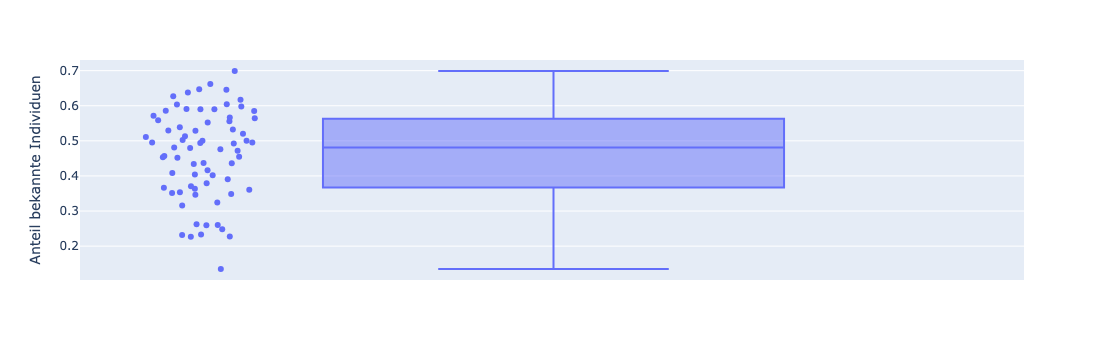

In [61]:
px.box(
    anthology_df_short,
    y = 'bekannte_individuen_share',
    points='all',
    hover_data = [anthology_df_short.index],
    labels = {'bekannte_individuen_share' : 'Anteil bekannte Individuen'}
)

In [62]:
anthology_df_short.loc['1915.Eggert-Windegg']

entity_count                 460.000000
bekannte_individuen_count    208.000000
bekannte_individuen_share      0.452174
rank                          43.000000
anthologies_higher            42.000000
anthologies_lower             28.000000
Name: 1915.Eggert-Windegg, dtype: float64